# Chapter 8: Forecasting

## 8.3 Moving Average

### 8.3.1 Loading and visualizing the time series dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

wsb_df = pd.read_csv( 'wsb.csv' )
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sn

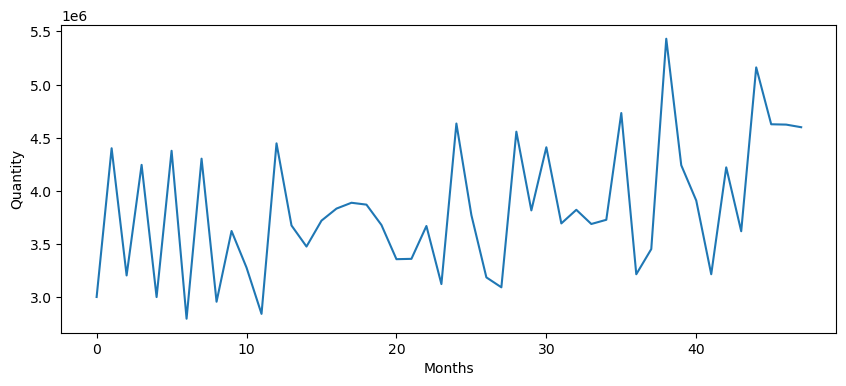

In [4]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'] );

In [5]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


### 8.3.2  Forecasting using Moving Average

In [6]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling( window = 12 ).mean().shift(1)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


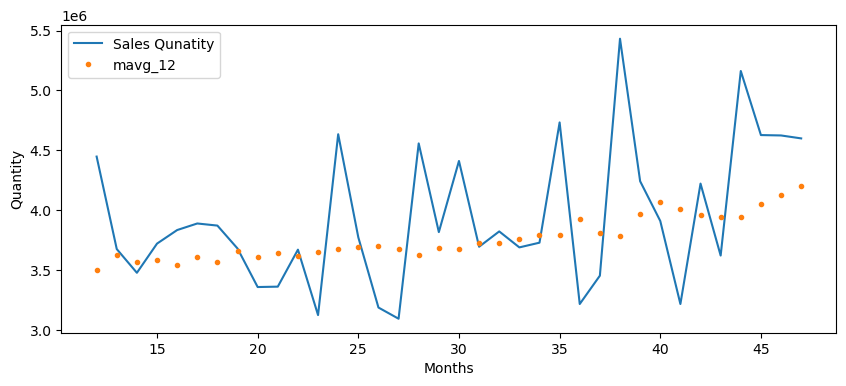

In [8]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'][12:], label = 'Sales Qunatity' );
plt.plot( wsb_df['mavg_12'][12:], '.', label = 'mavg_12' );
plt.legend();

### 8.3.3  Calculating forecast accuracy

#### 8.3.3.2 Root mean square error

In [9]:
import numpy as np

def get_mape(actual, predicted): 
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [10]:
get_mape( wsb_df['Sale Quantity'][36:].values, 
          wsb_df['mavg_12'][36:].values)

14.04

In [11]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error( wsb_df['Sale Quantity'][36:].values, 
                            wsb_df['mavg_12'][36:].values))

734725.8359239782

### 8.3.4 Exponential Smoothing

In [12]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm( alpha = 0.2 ).mean()

In [13]:
pd.options.display.float_format = '{:.2f}'.format

In [14]:
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [15]:
get_mape( wsb_df[['Sale Quantity']][36:].values, 
          wsb_df[['ewm']][36:].values)

11.15

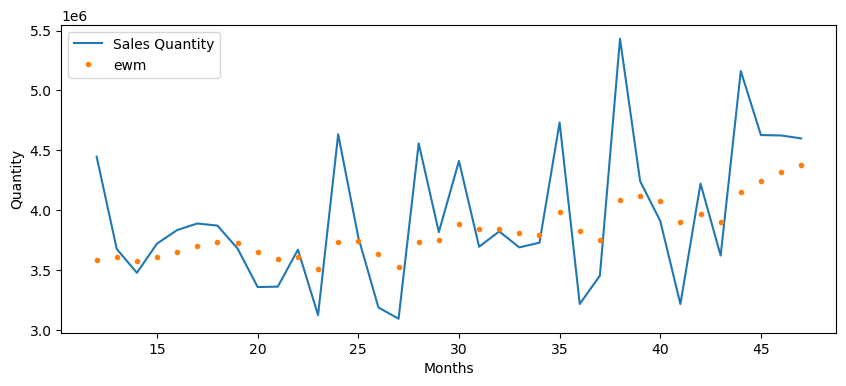

In [16]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'][12:], label = 'Sales Quantity' );
plt.plot( wsb_df['ewm'][12:], '.', label = 'ewm' );
plt.legend();

## 8.4 Decomposing Time Series

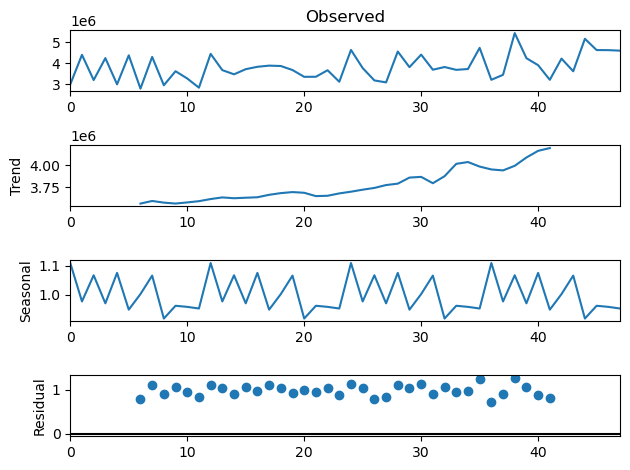

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompse = seasonal_decompose( np.array(wsb_df['Sale Quantity']), 
                                  model='multiplicative',
                                  period = 12)

## Plotting the deocompsed time series components
ts_plot = ts_decompse.plot()

In [18]:
wsb_df['seasonal'] = ts_decompse.seasonal
wsb_df['trend'] = ts_decompse.trend

## 8.5 Auto Regressive Integrated Moving Average Models (ARIMA)

### 8.5.1 Auto Regression (AR) Models

In [19]:
vimana_df = pd.read_csv('vimana.csv')

vimana_df.head(5)

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


In [20]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


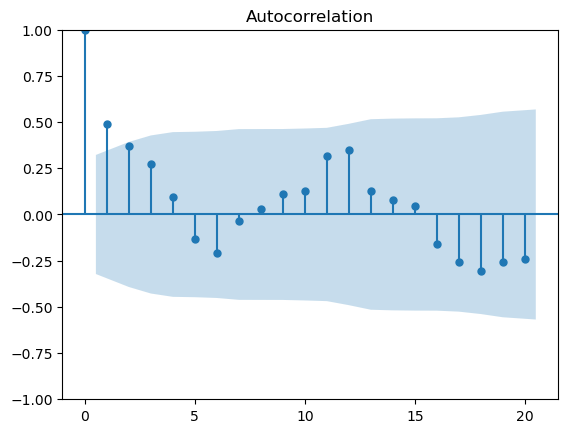

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Show autocorrelation upto lag 10
acf_plot = plot_acf( vimana_df.demand, 
                     lags=20)

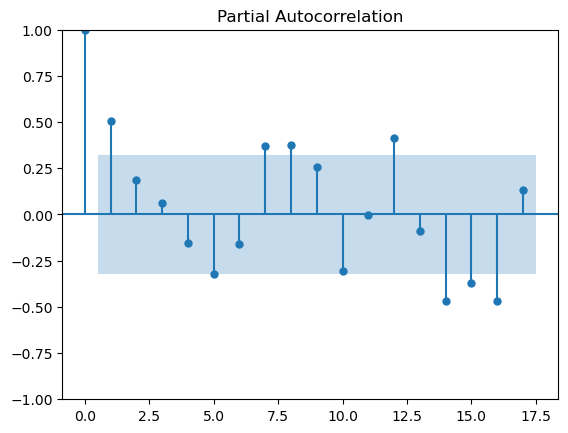

In [22]:
pacf_plot = plot_pacf( vimana_df.demand, 
                      lags=17 )

#### Building AR Model

In [23]:
from statsmodels.tsa.arima.model import ARIMA 

In [24]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).to_numpy(), 
              order = (1,0,0))
ar_model = arima.fit(cov_type='robust')

In [25]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -182.765
Date:                Thu, 01 May 2025   AIC                            371.530
Time:                        14:13:16   BIC                            375.734
Sample:                             0   HQIC                           372.875
                                 - 30                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4426     34.396     14.927      0.000     446.028     580.858
ar.L1          0.4726      0.155      3.056      0.002       0.169       0.776
sigma2      1.136e+04   2903.988      3.913      0.000    5670.325    1.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.46   Prob(JB):                         0.42
Heteroskedasticity (H):               2.72   Skew:                             0.59
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

####  Forecast and Measure Accuracy

In [26]:
forecast_31_37 = ar_model.predict(30, 36)

In [27]:
forecast_31_37

array([480.15274384, 497.71044601, 506.00789253, 509.92911287,
       511.78220935, 512.6579486 , 513.07180684])

In [28]:
get_mape( vimana_df.demand[30:], 
         forecast_31_37 )

19.12

### 8.5.2 Moving Average (MA) Processes

In [29]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).to_numpy(), 
              order = (0,0,1))
ma_model = arima.fit(cov_type='robust')
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -184.297
Date:                Thu, 01 May 2025   AIC                            374.595
Time:                        14:13:16   BIC                            378.799
Sample:                             0   HQIC                           375.940
                                 - 30                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.0213     26.719     19.350      0.000     464.652     569.390
ma.L1          0.3173      0.157      2.023      0.043       0.010       0.625
sigma2      1.265e+04   3161.222      4.000      0.000    6450.114    1.88e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.52   Prob(JB):                         0.33
Heteroskedasticity (H):               2.25   Skew:                             0.66
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [30]:
forecast_31_37 = ma_model.predict(30, 36)
get_mape( vimana_df.demand[30:], 
         forecast_31_37 )

17.78

### 8.5.3 ARMA Model

In [31]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).to_numpy(), 
              order = (1,0,1))
arma_model = arima.fit(cov_type='robust')
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -181.846
Date:                Thu, 01 May 2025   AIC                            371.692
Time:                        14:13:16   BIC                            377.296
Sample:                             0   HQIC                           373.485
                                 - 30                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.3844     41.249     12.325      0.000     427.538     589.230
ar.L1          0.7421      0.185      4.011      0.000       0.379       1.105
ma.L1         -0.3395      0.225     -1.511      0.131      -0.780       0.101
sigma2      1.065e+04   3041.889      3.503      0.000    4692.870    1.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.72   Prob(JB):                         0.29
Heteroskedasticity (H):               3.07   Skew:                             0.67
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [32]:
forecast_31_37 = arma_model.predict(30, 36)
get_mape( vimana_df.demand[30:], 
         forecast_31_37 )

20.27

### 8.5.4 ARIMA Model

#### 8.5.4.1 What is stationary data?

In [33]:
#!pip install xlrd

In [34]:
store_df = pd.read_excel('store.xls')

In [35]:
store_df.head(5)

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [36]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    115 non-null    datetime64[ns]
 1   demand  115 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [37]:
store_df.set_index( pd.to_datetime(store_df.Date), inplace= True)
store_df.drop('Date', axis = 1, inplace = True)
store_df[-5:]

,demand
Date,
2015-01-19,18
2015-01-20,22
2015-01-21,22
2015-01-22,21
2015-01-23,17


Now we will draw the ACF plot to verify stationarity.

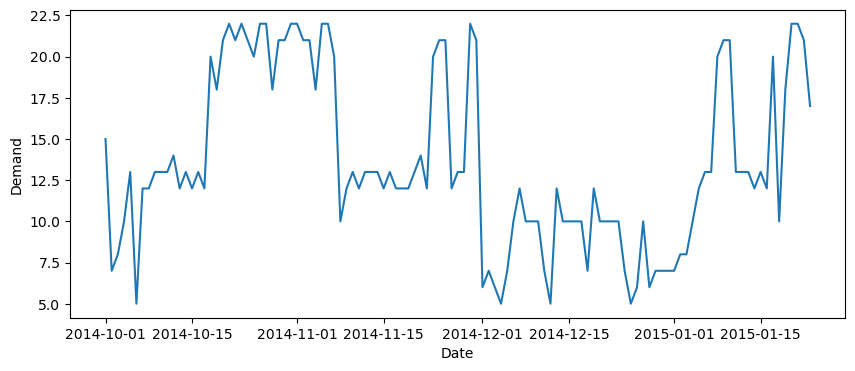

In [38]:
plt.figure( figsize=(10,4))
plt.xlabel( "Date" )
plt.ylabel( "Demand" )
plt.plot( store_df.demand );

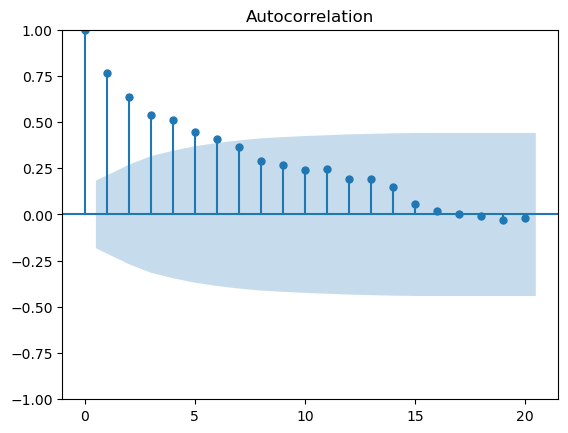

In [39]:
acf_plot = plot_acf( store_df.demand, 
                     lags=20 )

#### 8.5.4.2 Dicky-Fuller Test

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
def adfuller_test( ts ):
    adfuller_result = adfuller( ts, autolag=None )
    adfuller_out = pd.Series(adfuller_result[0:4], 
                         index=['Test Statistic',
                                'p-value',
                                'Lags Used',
                                'Number of Observations Used'])
    print( adfuller_out )

In [42]:
adfuller_test( store_df.demand )

Test Statistic                 -1.65
p-value                         0.46
Lags Used                      13.00
Number of Observations Used   101.00
dtype: float64


#### 8.5.4.3 Differencing 

In [43]:
store_df['demand_diff'] = store_df.demand - store_df.demand.shift(1)

In [44]:
store_df.head(5)

,demand,demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [45]:
store_diff_df = store_df.dropna()

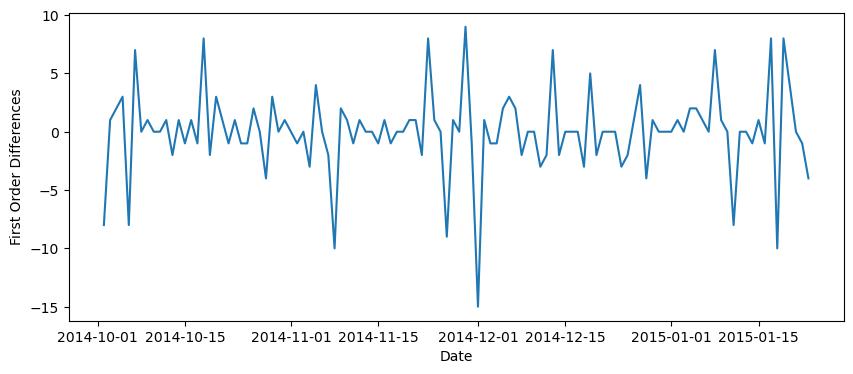

In [46]:
plt.figure( figsize=(10,4))
plt.xlabel( "Date" )
plt.ylabel( "First Order Differences" )
plt.plot( store_diff_df.demand_diff );

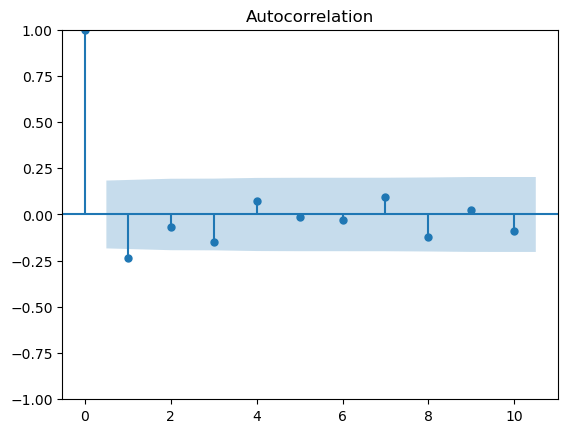

In [47]:
pacf_plot = plot_acf( store_df.demand_diff.dropna(), 
                       lags=10 )

In [48]:
store_train = store_df[0:100]
store_test = store_df[100:]

In [49]:
arima = ARIMA( store_train.demand.astype(np.float64).to_numpy(), 
               order = (1,1,1))
arima_model = arima.fit(cov_type='robust')
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -256.910
Date:                Thu, 01 May 2025   AIC                            519.821
Time:                        14:13:16   BIC                            527.606
Sample:                             0   HQIC                           522.971
                                - 100                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4091      0.160      2.549      0.011       0.095       0.724
ma.L1         -0.7179      0.135     -5.330      0.000      -0.982      -0.454
sigma2        10.4865      2.560      4.096      0.000       5.469      15.504
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                75.18
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.79
Prob(H) (two-sided):                  0.44   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

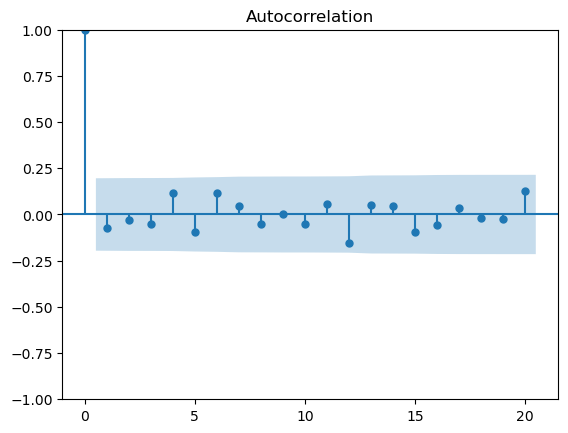

In [50]:
acf_plot = plot_acf(arima_model.resid, 
                    lags = 20)

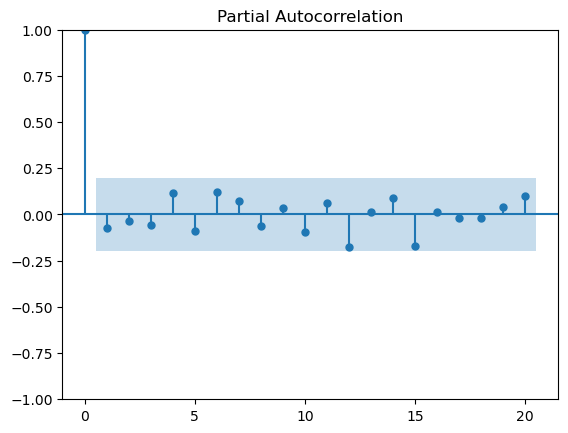

In [51]:
pacf_plot = plot_pacf(arima_model.resid, 
                      lags = 20)

#### 8.5.4.4 Forecast and measure accuracy

In [52]:
store_predict = arima_model.get_forecast(steps = 15)

In [53]:
store_predict.predicted_mean

array([17.25076305, 16.1261189 , 15.66605507, 15.47785446, 15.40086629,
       15.36937235, 15.35648897, 15.3512187 , 15.34906276, 15.34818082,
       15.34782004, 15.34767246, 15.34761208, 15.34758739, 15.34757728])

In [54]:
get_mape( store_df.demand[100:], 
          store_predict.predicted_mean )

24.12